In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load Dataset - in train test split form
(X_train, y_train), (X_test, y_test) =  keras.datasets.mnist.load_data()

### Understand Dataset

In [4]:
#Number of train examples
len(X_train)

60000

In [5]:
#Number of test examples
len(X_test)

10000

In [6]:
# Shape of Test data
X_train.shape
#(60000, 28, 28) = 60000 examples of [28.28]

(60000, 28, 28)

In [7]:
# Shape of 1 Test data element
X_train[0].shape

(28, 28)

In [8]:
# Print first train data elelment
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
#Print first y train element
y_train[0]

np.uint8(5)

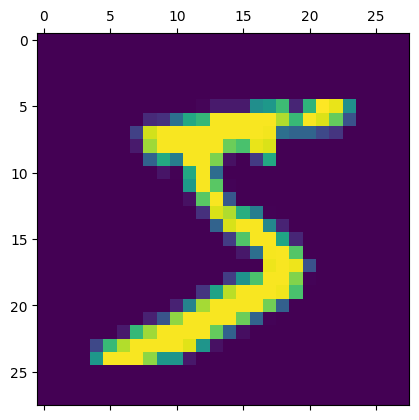

In [11]:
# plt.matshow() displays the matrix (like an image).
plt.matshow(X_train[0])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

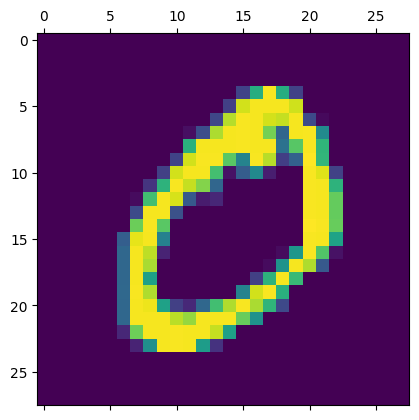

In [12]:
plt.matshow(X_train[1])
plt.show

In [13]:
# Check y value for above x
y_train[1]

np.uint8(0)

In [14]:
# Print first 5 y train values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Data Preprocessing

In [15]:
#Flatten X_trian from (60000, 28, 28 ) to (60000, 784)
    #Most neural networks (like Sequential models with Dense layers) expect the input as a 1D vector rather than a 2D matrix. 
    #So you reshape it.

X_train_flatened = X_train.reshape(len(X_train), 28*28)
X_test_flatened = X_test.reshape(len(X_test), 28*28)
#Also can use: X_train_flatened = X_train.reshape(-1, 28 * 28) --> -1 lets NumPy automatically figure out how many samples there are — it's a placeholder for "whatever fits."

X_train_flatened.shape

(60000, 784)

In [16]:
X_train_flatened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Model Training

In [18]:
#Basic Architecture (Exclusing normalization here, so as to understand its impact)

model = tf.keras.Sequential([
tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # input must be flattened
tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    
model.fit(X_train_flatened, y_train, epochs=10)


Epoch 1/10


C:\Users\pushk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8155 - loss: 7.2459
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8996 - loss: 0.3997
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9250 - loss: 0.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9356 - loss: 0.2445
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9409 - loss: 0.2232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9449 - loss: 0.2129
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9487 - loss: 0.1934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1944
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9531 - loss: 0.1827
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9544 - loss: 0.1776


In [19]:
# Model Testing
test_loss, test_acc = model.evaluate(X_test_flatened, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9374


In [20]:
# Scaling is always recommended --> faster convergence, better performance, stability
# Scaling X values to (0,1) is usually suited for ReLU

X_train_scaled = X_train_flatened.astype("float32") / 255
X_test_scaled = X_test_flatened.astype("float32") / 255

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # input must be flattened
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy with Scaled data: {test_acc:.4f}")


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8710 - loss: 0.4512 - val_accuracy: 0.9648 - val_loss: 0.1299
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9606 - loss: 0.1326 - val_accuracy: 0.9713 - val_loss: 0.0954
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0835 - val_accuracy: 0.9742 - val_loss: 0.0866
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0629 - val_accuracy: 0.9760 - val_loss: 0.0825
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0461 - val_accuracy: 0.9783 - val_loss: 0.0816
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0359 - val_accuracy: 0.9717 - val_loss: 0.0956
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9777 - val_loss: 0.0850
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0235 - 

##### Inference: This demonstrates how important scaling is --> 0.95 to 0.97

### Model Optimization

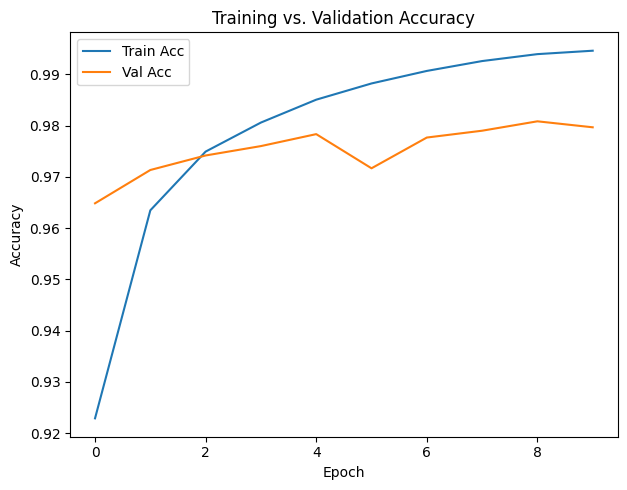

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Inference: 
- Early epochs(0-2): both trainig and validation accuracy increases --> Model Learning meaningful patterns from data
- Mid Epoch(3-5): Training accuracy continues to rise ~99%, Validation accuracy flattens around 97.8% -->  Model is no longer generalizing.
- Later Epoch(6-9): Training accuracy keeps increasing, Validation accuracy stagnates. -->  early signs of overfitting.

Training accuracy is already high, so NO need for more complex model (more layers or more nuerons) --> Will only worsen overfitting if complex
There's a Gap between Train and validation accuracy(variance), this can be improved --> Regularisation/Dropout

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9969 - loss: 0.0119 - val_accuracy: 0.9822 - val_loss: 0.0759
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 0.9800 - val_loss: 0.0897
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9812 - val_loss: 0.0830
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9783 - val_loss: 0.0952
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9792 - val_loss: 0.1009
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9815 - val_loss: 0.0947
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9833 - val_loss: 0.0891
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9991 - loss: 0.0036 - 

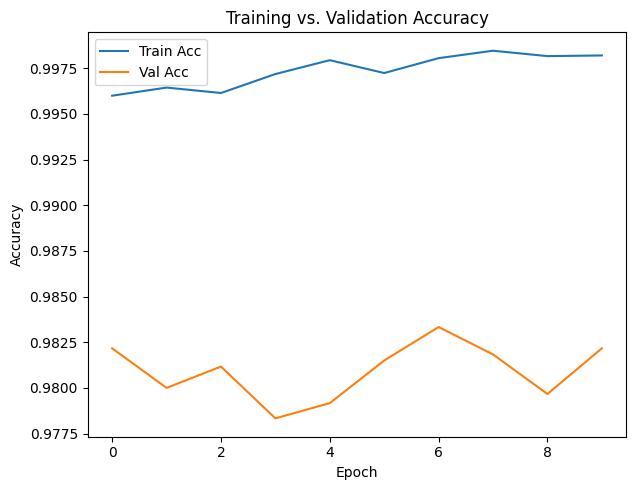

In [24]:
#Dropout --> Reducing Overfitting

# Train with validation data
history = model.fit(X_train_scaled, y_train,
                    epochs=10,
                    validation_split=0.1
                   ) 

test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy with Scaled data: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Observation:
- Training Accuracy: Grows more slowly, stays around 99.7%
- Validation Accuracy: Almost Matches training accuracy (~98.2%)
- Gap (Variance): Almost zero or slightly reversed (val ≈ train)

Inference:
- ✅ Dropout helped in reducing overfitting.
- 🔻 You’ve sacrificed a bit of training accuracy (expected), but now your model generalizes better --> Improved training accuracy
- 📉 The reduced gap and stable validation accuracy → your model is now more robust.


### Prediction

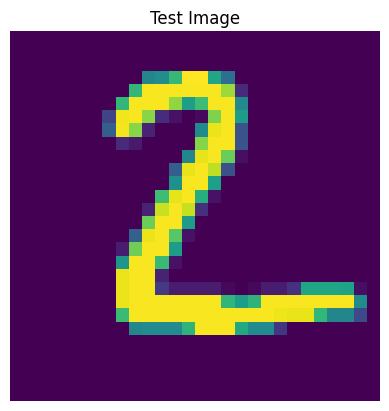

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Probablities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Digit: 2


In [25]:
#Prediction
test_image = X_test[1]

# Plot the image for verification
plt.imshow(test_image.reshape(28, 28))
plt.title("Test Image")
plt.axis('off')
plt.show()

# Reshape to match model input: (1, 784)
test_image_reshaped = test_image.reshape(1, 784)

# Predict
pred_probs = model.predict(test_image_reshaped)
predicted_class = np.argmax(pred_probs)

print(f"Predicted Probablities: {pred_probs}")
print(f"Predicted Digit: {predicted_class}")

### Real Time Prediction

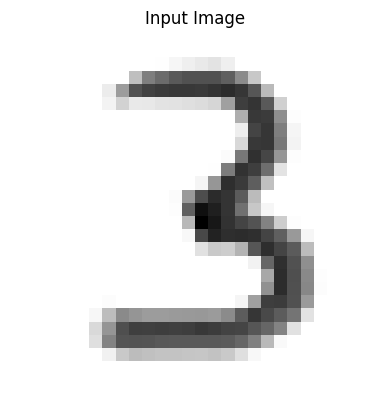

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digit: 3
Class Probabilities:
0: 0.0000
1: 0.0000
2: 0.0000
3: 1.0000
4: 0.0000
5: 0.0000
6: 0.0000
7: 0.0000
8: 0.0000
9: 0.0000


In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess image
def load_image(filepath):
    # Load and convert to grayscale
    img = Image.open(filepath).convert('L')  # 'L' = grayscale
    img = img.resize((28, 28))               # Resize to MNIST format
    img_np = np.array(img)

    # Invert colors if needed (MNIST digits are white on black)
    img_np = 255 - img_np

    # Normalize and reshape
    img_np = img_np.astype("float32") / 255.0
    img_np = img_np.reshape(1, 784)  # same as (1, 28*28)

    return img_np, img

# Step 2: Predict using trained model
def predict_digit(filepath):
    preprocessed_img, raw_img = load_image(filepath)

    # Show image
    plt.imshow(raw_img, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Predict
    pred_probs = model.predict(preprocessed_img)
    pred_class = np.argmax(pred_probs)

    # Output
    print(f"Predicted Digit: {pred_class}")
    print("Class Probabilities:")
    for i, prob in enumerate(pred_probs[0]):
        print(f"{i}: {prob:.4f}")

# 🔁 Example usage
predict_digit("C:\\Users\\pushk\\OneDrive\\Desktop\\three.png")  


### Export Model

In [27]:
model.save("mnist_digit_model.h5")